# From the given "Iris" dataset, predict the optimum number of clusters and represent it visually

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

iris_data.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Using the Elbow Method to find the optimum number of clusters for K Means? 


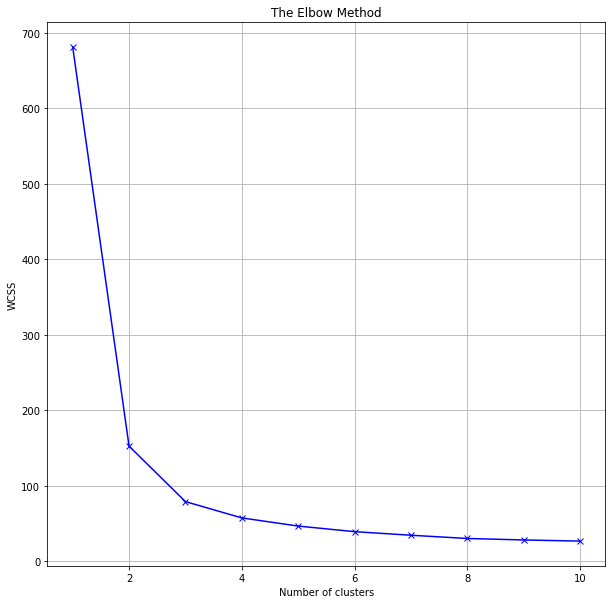

In [4]:
# In x variable saving only the features

x = iris_data.iloc[:, [0, 1, 2, 3]].values
wcss = []

# Setting the range of from 1 to 11 in variable K
K = range(1, 11)
for k in K:
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeansModel.fit(x)
    wcss.append(kmeansModel.inertia_)
    
plt.figure(figsize=(10, 10))
# Plotting the results onto a line graph, 
plt.plot(K, wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

So this is the method called 'The elbow method' from the above plot, the optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this elbow method we choose the number of clusters as __'3'__.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print('KMeans classifier created')

KMeans classifier created


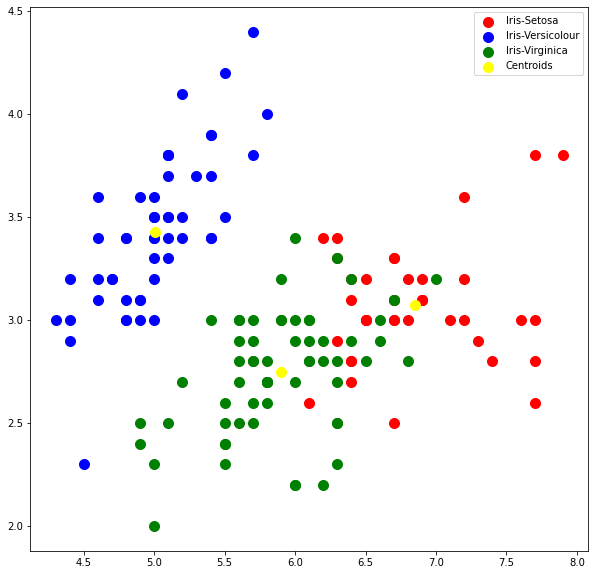

In [ ]:
plt.figure(figsize=(10, 10))
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

From this cluster scatter plot we can say that why elbow method said that we need __3__ clusters.